In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import rcParams

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 500    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width, fig_height]
rcParams.update({'figure.figsize': fig_size})

In [21]:
data = pd.read_csv("climate_change.csv")

In [24]:
data_features = data[["MEI","CO2","CH4","N2O","CFC-12","TSI","Aerosols","Temp"]]

In [34]:
class_arr = []
j = 0

for i in range(len(data)):
    class_arr.append(j)
    
    if i>0 and i%24 == 0:
        j += 1

In [37]:
data_features['class'] = class_arr

/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


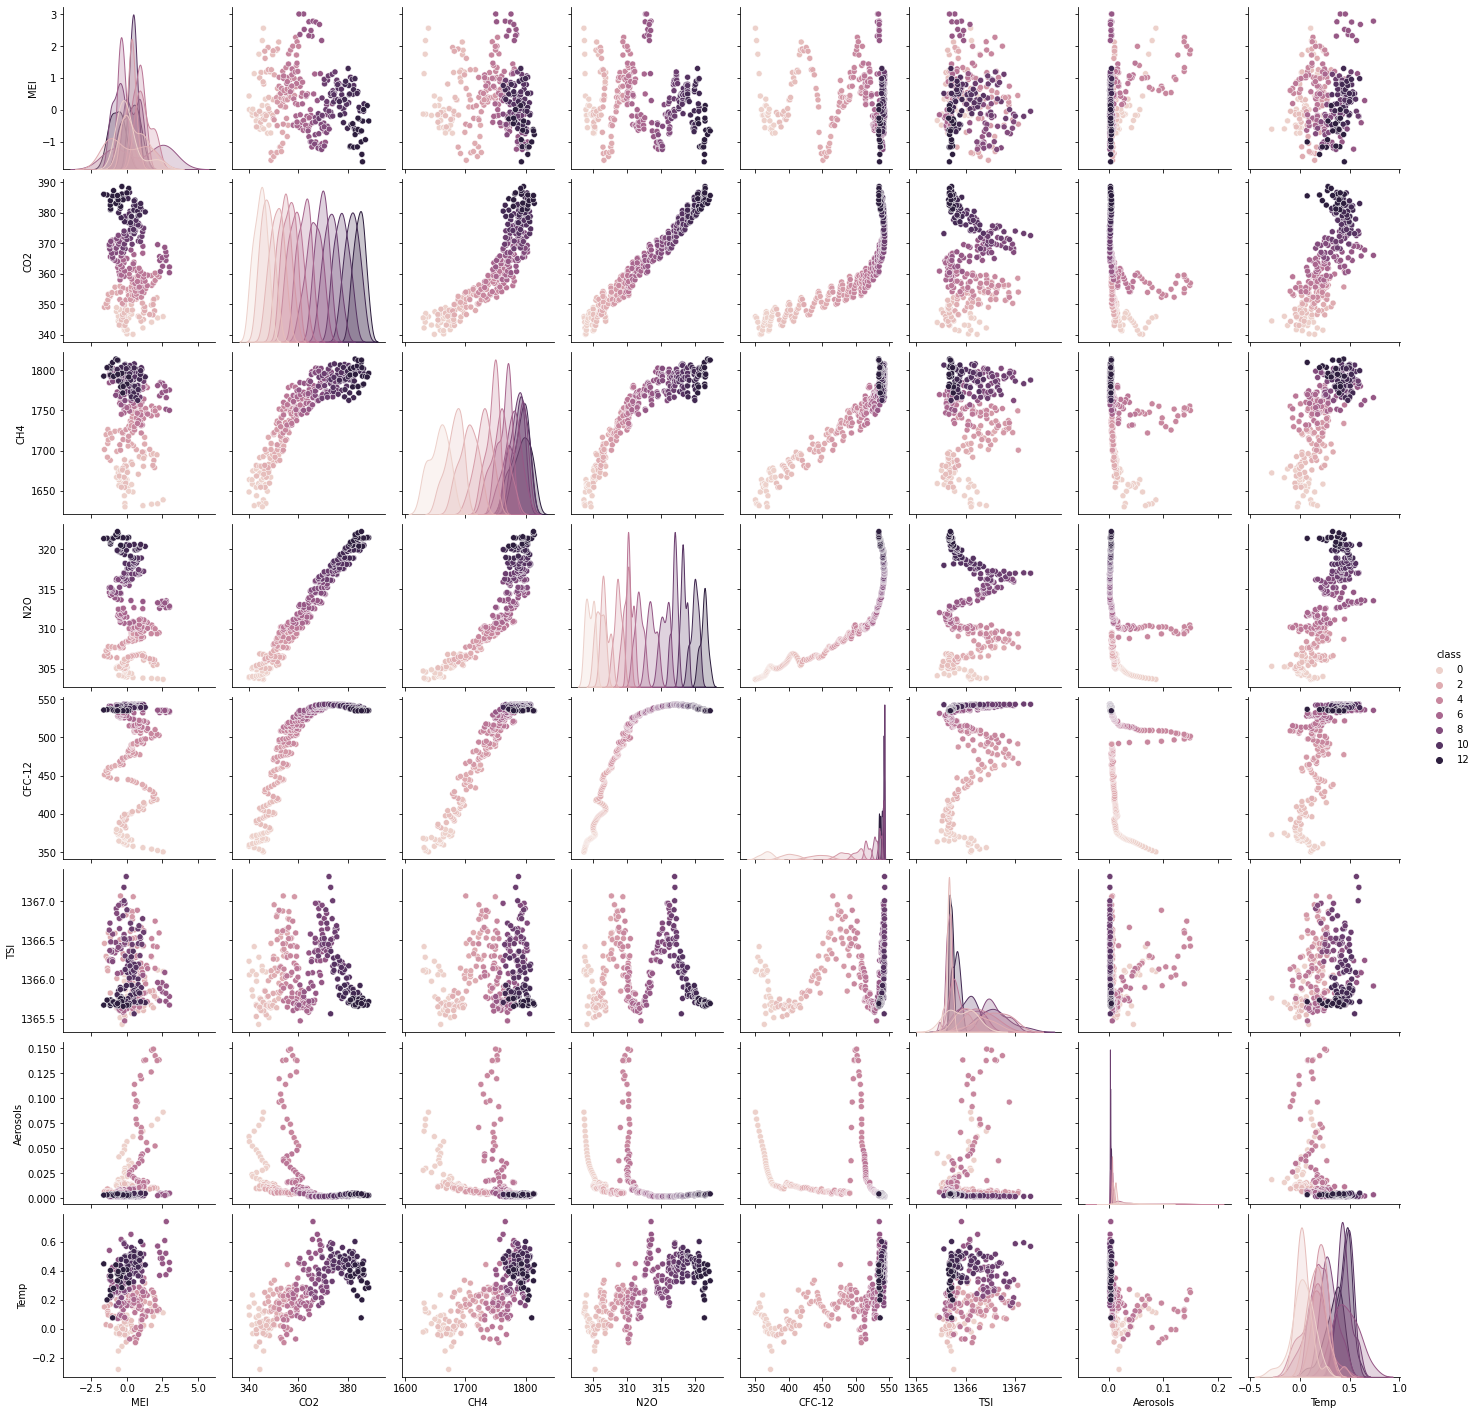

In [38]:
sns.pairplot(data_features, hue='class')
plt.show()

In [57]:
X_train = data[["MEI","CO2","CH4","N2O","CFC-12","TSI","Aerosols"]][:284]
y_train = data["Temp"][:284]

In [58]:
reg = LinearRegression().fit(X_train, y_train)

In [59]:
reg.score(X, y)

0.7358302653844011

In [60]:
X_test = data[["MEI","CO2","CH4","N2O","CFC-12","TSI","Aerosols"]][285:]

In [67]:
y_test = reg.predict(X_test)

In [68]:
y_observed = data["Temp"][285:] 

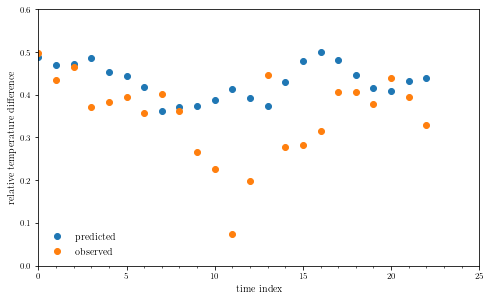

In [88]:
fig, ax = plt.subplots()
plt.plot(y_test,'o',label=r"predicted")
plt.plot(y_observed.to_numpy(),'o',label=r"observed")
plt.xlim(0,25)
plt.ylim(0,0.6)
plt.xlabel(r"time index")
plt.ylabel(r"relative temperature difference")
plt.legend(loc=3,frameon=False)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.tight_layout()
plt.show()